In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_lr = 0.01
_batch_size = 32

In [3]:
_x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
_noise = np.random.normal(0, 0.1, size=_x.shape)
_y = np.power(_x, 2) + _noise   

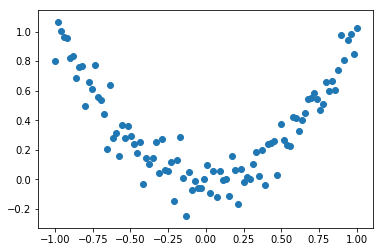

In [4]:
plt.scatter(_x, _y)
plt.show()

In [7]:
# default network
class Net:
    def __init__(self, opt, **kwargs):
        self._x = tf.placeholder(tf.float32, [None, 1])
        self._y = tf.placeholder(tf.float32, [None, 1])
        _layer = tf.layers.dense(self._x, 20, tf.nn.relu)
        _out = tf.layers.dense(_layer, 1)
        self._loss = tf.losses.mean_squared_error(self._y, _out)
        self._train = opt(_lr, **kwargs).minimize(self._loss)

In [9]:
# different nets
_net_SGD         = Net(tf.train.GradientDescentOptimizer)
_net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
_net_RMSprop     = Net(tf.train.RMSPropOptimizer)
_net_Adam        = Net(tf.train.AdamOptimizer)
_nets = [_net_SGD, _net_Momentum, _net_RMSprop, _net_Adam]

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
_losses_his = [[], [], [], []]   # record loss

In [16]:
# training
for step in range(300):          # for each training step
    _index = np.random.randint(0, _x.shape[0], _batch_size)
    _b_x = _x[_index]
    _b_y = _y[_index]

    for _net, _l_his in zip(_nets, _losses_his):
        _, _l = sess.run([_net._train, _net._loss], {_net._x: _b_x, _net._y: _b_y})
        _l_his.append(_l)     # loss recoder

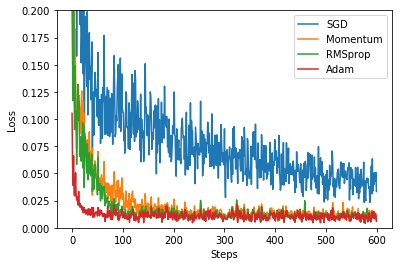

In [19]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for _i, _l_his in enumerate(_losses_his):
    plt.plot(_l_his, label=labels[_i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()